In [82]:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
import umap
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("train_in.csv", header=None)
labels = pd.read_csv("train_out.csv", header=None)
df["label"] = labels[0]
#print(df.head())
df_test = pd.read_csv("test_in.csv", header=None)
labels_test = pd.read_csv("test_out.csv", header=None)
df_test["label"] = labels_test[0]

# calculate the means for each digit
c_d = {d: [] for d in range(10)}
for i in range(10):
    Cloud_d = df[df["label"] == i]
    means = Cloud_d.iloc[:, :-1].mean()
    means = means.to_numpy()
    c_d[i] = means

In [72]:
def distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

def nearest_mean_classifier(means, data_point):
    # go through values and keys in means
    min_dist = float("inf")
    label = -1
    for key, value in means.items():
        dist = distance(data_point, value)
        if dist < min_dist:
            min_dist = dist
            label = key
    return label


In [26]:
#all combinations of numbers 0-9
comb = combinations(range(10), 2)
#dictionary of all distances between centers
center_distances = {i: float(distance(c_d[i[0]], c_d[i[1]])) for i in comb}
center_distances

{(0, 1): 14.44960796590658,
 (0, 2): 9.334555870229643,
 (0, 3): 9.143733671882783,
 (0, 4): 10.769844437633486,
 (0, 5): 7.519296259597183,
 (0, 6): 8.154443125778972,
 (0, 7): 11.864555054634076,
 (0, 8): 9.90790173732039,
 (0, 9): 11.488874937417041,
 (1, 2): 10.12532257709667,
 (1, 3): 11.733232901831073,
 (1, 4): 10.173786431281785,
 (1, 5): 11.118800407467436,
 (1, 6): 10.614700366283566,
 (1, 7): 10.743153673524732,
 (1, 8): 10.086776773038181,
 (1, 9): 9.932093699343712,
 (2, 3): 8.178284885647821,
 (2, 4): 7.932541482770051,
 (2, 5): 7.906796320949824,
 (2, 6): 7.331807539320809,
 (2, 7): 8.872531069307183,
 (2, 8): 7.077516177863561,
 (2, 9): 8.88774785200019,
 (3, 4): 9.087607799539475,
 (3, 5): 6.118750020921418,
 (3, 6): 9.302064730092098,
 (3, 7): 8.922400934698304,
 (3, 8): 7.020424894700362,
 (3, 9): 8.354350120111869,
 (4, 5): 8.001517414291124,
 (4, 6): 8.78223264756089,
 (4, 7): 7.583012282564445,
 (4, 8): 7.380908991053923,
 (4, 9): 6.0104079308959975,
 (5, 6): 6.69

In [ ]:
# smallest distance between centers
min(center_distances.items(), key=lambda x: x[1])

In [ ]:
X = df.drop(columns=["label"])
y = df["label"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

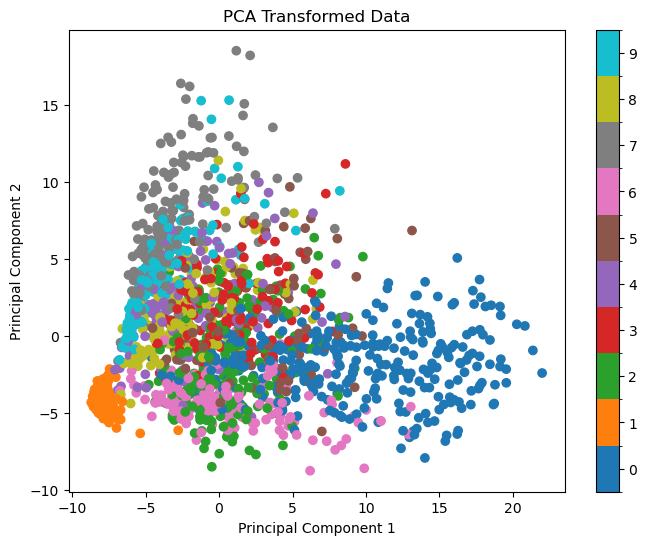

In [46]:
norm = mcolors.BoundaryNorm(boundaries=np.arange(-0.5, 10.5, 1), ncolors=10)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', norm=norm)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data")
plt.colorbar(ticks=range(10))
plt.show()

Task 1.2: TSNE

In [50]:
model = TSNE(n_components = 2, random_state = 0)
X_tsne = model.fit_transform(X)

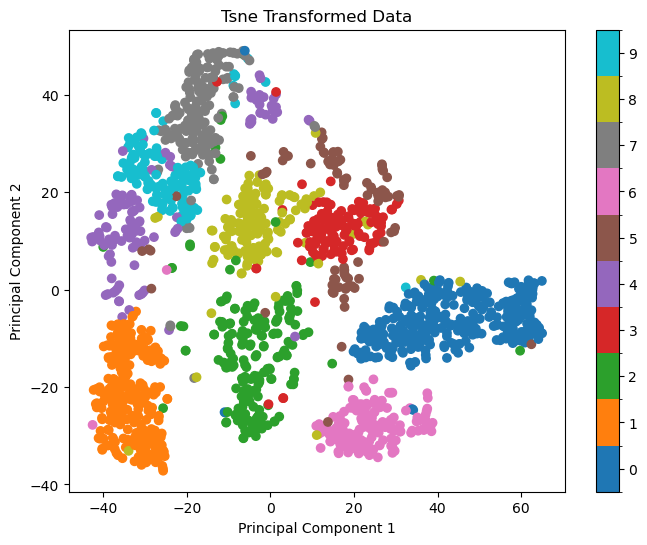

In [ ]:
norm = mcolors.BoundaryNorm(boundaries=np.arange(-0.5, 10.5, 1), ncolors=10)
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', norm=norm)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("T-SNE Transformed Data")
plt.colorbar(ticks=range(10))
plt.show()

Task 1.2 Umap

In [67]:
X_umap = umap.UMAP().fit_transform(X)

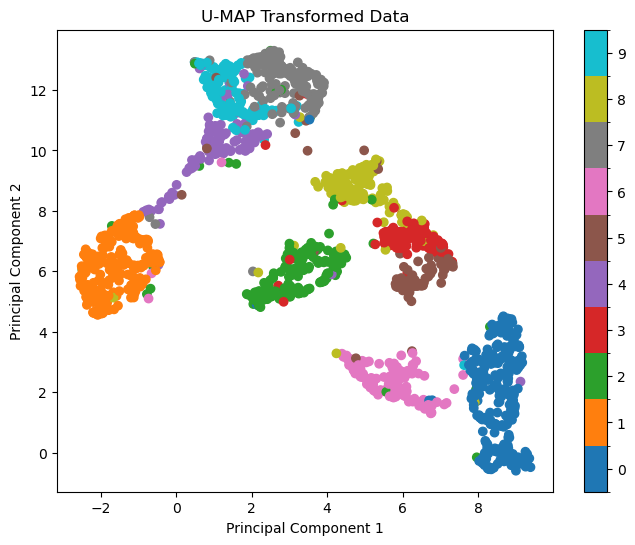

In [68]:
norm = mcolors.BoundaryNorm(boundaries=np.arange(-0.5, 10.5, 1), ncolors=10)
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', norm=norm)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("U-MAP Transformed Data")
plt.colorbar(ticks=range(10))
plt.show()

Task 1.3

In [79]:
# predict all labels for train set based on nearest mean classifier
predictions = []
for i in range(len(df)):
    data_point = df.iloc[i, :-1].to_numpy()
    predictions.append(nearest_mean_classifier(c_d, data_point))

# percentage of correctly classified digits
correct = sum([1 for i in range(len(predictions)) if predictions[i] == df.iloc[i, -1]])
accuracy = correct / len(predictions)
print(f"Accuracy on training set: {accuracy*100:.2f}%")

# predict all labels for test set based on nearest mean classifier
predictions_test = []
for i in range(len(df_test)):
    data_point = df_test.iloc[i, :-1].to_numpy()
    predictions_test.append(nearest_mean_classifier(c_d, data_point))

# percentage of correctly classified digits in test set
correct_test = sum([1 for i in range(len(predictions_test)) if predictions_test[i] == df_test.iloc[i, -1]])
accuracy_test = correct_test / len(predictions_test)
print(f"Accuracy on test set: {accuracy_test*100:.2f}%")


Accuracy on training set: 86.35%
Accuracy on test set: 80.40%


Task 1.4

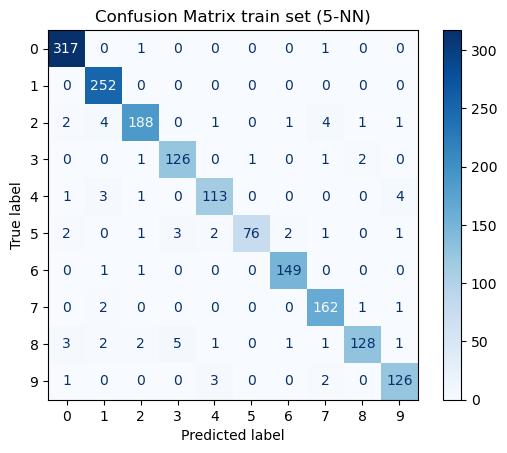

In [ ]:
# k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# predict on train set
y_pred = knn.predict(X)    

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix train set (5-NN)')
plt.show()


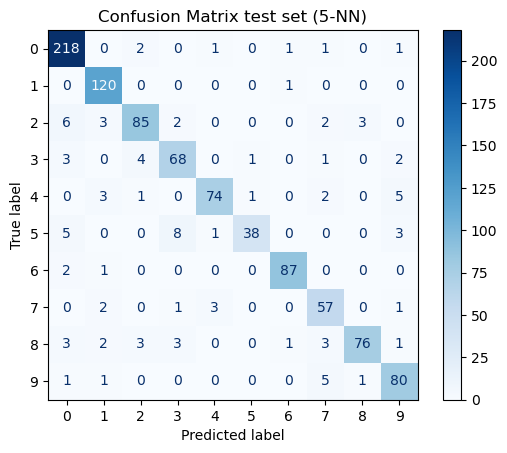

In [86]:
X_test = df_test.drop(columns=["label"])
y_test = df_test["label"]

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# predict on train set
y_pred_test = knn.predict(X_test)    


cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix test set (5-NN)')
plt.show()